# What is Binning?

#### Binning is the process of converting a continuous variable into discrete "bins" or intervals. This technique is helpful when:
#### Reducing noise: Grouping similar values together can smooth out minor variations.
#### Handling outliers: Extreme values get grouped into a bin.
#### Improving interpretability: Instead of a continuous value, you get a category (e.g., "Low", "Medium", "High").

### Real-World Scenario for Binning

#### Imagine you are analyzing house prices. 
#### Rather than dealing with every unique price, you might group prices into bins such as Low, Medium, and High. 
#### This makes it easier to compare groups and perhaps build models that predict price categories rather than exact prices.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(sns.load_dataset("iris"))
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
# np.linspace generates equally spaced values from the min to max based on edges i.e. 5
bins = np.linspace(df['sepal_length'].min(), df['sepal_length'].max(), 5) # creates 4 bins for 5 edges

#Splits the sepal_length values into bins.
#labels Assigns a name to each bin.
#include_lowest=True Ensures that the lowest value is included in the first bin.
df['sepal_length_cat'] = pd.cut(df['sepal_length'], bins=bins, labels = ['Short', 'Medium', 'Long', 'Longest'], include_lowest=True)

print(df[['sepal_length', 'sepal_length_cat']].head())

   sepal_length sepal_length_cat
0           5.1            Short
1           4.9            Short
2           4.7            Short
3           4.6            Short
4           5.0            Short


<Axes: xlabel='sepal_length_cat', ylabel='Count'>

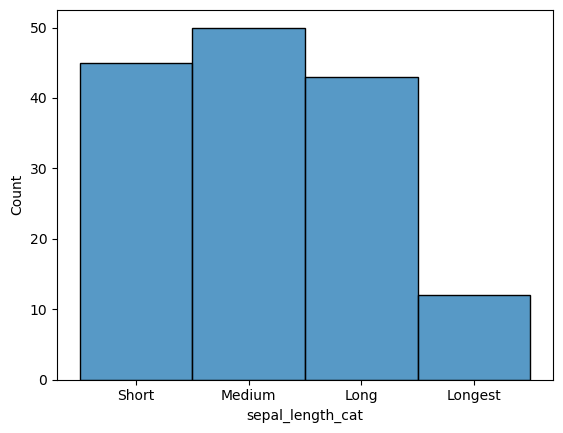

In [3]:
sns.histplot(data= df, x='sepal_length_cat')

# What is Binarization?

#### Binarization is the process of converting a variable into binary (0 or 1) values. This is useful when:
#### Simplifying features: You want to represent a condition as true/false.
#### Threshold-based decisions: For example, labeling if a value is above or below a threshold.

### Real-World Scenario for Binarization

#### Consider a medical diagnosis where you have blood pressure readings. Instead of using the exact numbers, 
#### you might want to create a feature that indicates whether a patient has high blood pressure (1) or not (0) based on a threshold.

In [4]:
df = pd.DataFrame(sns.load_dataset('titanic'))
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [6]:
df['is_adult'] = df['age'].apply(lambda age : 1 if age >= 18 else 0 if pd.notnull(age) else np.nan)

print(df[['age', 'is_adult']].head())

    age  is_adult
0  22.0       1.0
1  38.0       1.0
2  26.0       1.0
3  35.0       1.0
4  35.0       1.0


Text(0.5, 1.0, 'Count of Adults (1) vs Non-Adults (0) in Titanic Dataset')

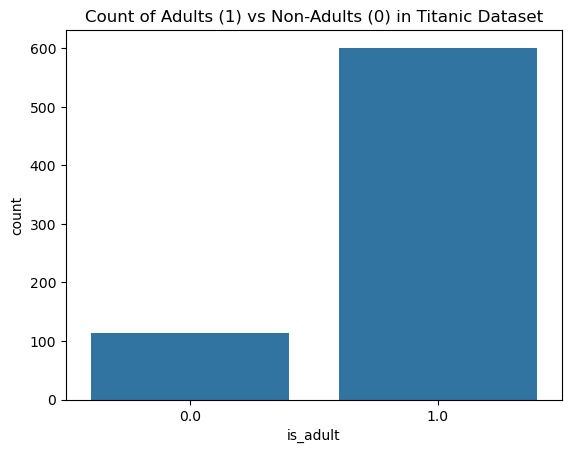

In [9]:
sns.countplot(data=df, x=df['is_adult'])
plt.title("Count of Adults (1) vs Non-Adults (0) in Titanic Dataset")